In [2]:
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [4]:
tf.__version__ # or tf.version.VERSION

'2.7.0'

TensorShape([64, 64, 3])

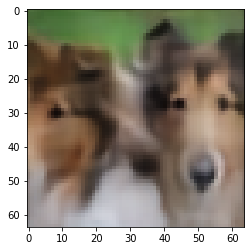

In [6]:
def decode_image_from_raw_data(image_path="images/train/500.png"):
    im_path = tf.io.read_file(image_path)
    img = tf.io.decode_image(im_path)
    img = tf.image.convert_image_dtype(img, tf.float32)
    # img = tf.image.resize(img, [500,500])
    return img
img = decode_image_from_raw_data()
# plt.title("TensorFlow Logo with shape {}".format(img.shape))
_ = plt.imshow(img)
img.shape

In [5]:
# datagen = image_dataset_from_directory("images/")
datagen = ImageDataGenerator(rescale=1./255)
train_batches = datagen.flow_from_directory("images/train/",target_size=(64,64),batch_size=256,shuffle=True,class_mode="input")

Found 0 images belonging to 0 classes.


In [17]:
img.shape

TensorShape([64, 64, 3])

In [18]:
imageinput = layers.Input(shape=img.shape)
x = layers.Conv2D(48,kernel_size=(3,3),activation='relu',input_shape = img.shape)(imageinput)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Conv2D(96,(3,3),activation='relu',padding='same')(x)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Conv2D(192,(3,3),activation='relu',padding='same')(x)
x = layers.MaxPooling2D((2,2),padding='same')(x)
encoded = layers.Conv2D(32,(1,1),activation='relu',padding='same')

In [19]:
directinput = layers.Input(shape=(8,8,32))
x = layers.Conv2D(192, (1, 1), activation='relu', padding='same')(directinput)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(96,(3,3),activation='relu',padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(192,(3,3),activation='relu',padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = img.shape)(imageinput)
decoded = layers.Conv2D(3,(3,3),activation='sigmoid',padding='same')(x)

In [22]:
encoder = Model(imageinput,encoded)
decoder = Model(directinput,decoded)
autoEncoder = Model(imageinput,decoder(encoded))

ValueError: Output tensors of a Functional model must be the output of a TensorFlow `Layer` (thus holding past layer metadata). Found: <keras.layers.convolutional.Conv2D object at 0x7fbe2c175f40>

In [55]:
tf.size(img).numpy()

12288

In [56]:
x = keras.Input(shape=img.shape)
# x1 =layers.Flatten()(x)
encoder = layers.Conv2D(filters=128,kernel_size=5,strides=2)(x)
encoder = layers.MaxPool2D((2,2),padding='same')(encoder)
encoder = layers.LeakyReLU(alpha=0.2)(encoder)
encoder = layers.BatchNormalization(axis=1)(encoder)
flatt = =tf.size(img).numpy()
# encoded = layers.Dense(16,activation='softmax')(x1)
# decoded = layers.Dense(shape=tf.size(img).numpy(),activation='sigmoid')(encoded)
# model = keras.Model(x,decoded)

TypeError: __init__() missing 1 required positional argument: 'units'

In [25]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D


In [18]:
# ENCODER
input_img = Input(shape=(64, 64, 3))  
x = Conv2D(48, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(32, (1, 1), activation='relu', padding='same')(x)

# LATENT SPACE
latentSize = (8,8,32)

# DECODER
direct_input = Input(shape=latentSize)
x = Conv2D(192, (1, 1), activation='relu', padding='same')(direct_input)
x = UpSampling2D((2, 2))(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# COMPILE
encoder = Model(input_img, encoded)
decoder = Model(direct_input, decoded)
autoencoder = Model(input_img, decoder(encoded))

autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

In [19]:
encoder.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 64, 64, 48)        1344      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 32, 32, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 32, 32, 96)        41568     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 16, 16, 192)       166

In [20]:
decoder.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 8, 8, 32)]        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 8, 8, 192)         6336      
                                                                 
 up_sampling2d_12 (UpSamplin  (None, 16, 16, 192)      0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 192)       331968    
                                                                 
 up_sampling2d_13 (UpSamplin  (None, 32, 32, 192)      0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 32, 32, 96)        165

In [46]:
BATCH_SIZE = 256; EPOCHS = 10
train_datagen = ImageDataGenerator(rescale=1./255)
train_batches = train_datagen.flow_from_directory('images/',  target_size=(64,64), shuffle=True, class_mode='input', batch_size=BATCH_SIZE)
train_batches.samples

Found 10000 images belonging to 2 classes.


10000

In [47]:

history = autoencoder.fit_generator(train_batches,
        steps_per_epoch = train_batches.samples // BATCH_SIZE,
        epochs = EPOCHS, verbose=2)

<ipython-input-47-f3cac48f93f9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = autoencoder.fit_generator(train_batches,


Epoch 1/10
39/39 - 239s - loss: 0.6414 - 239s/epoch - 6s/step
Epoch 2/10
39/39 - 239s - loss: 0.6006 - 239s/epoch - 6s/step
Epoch 3/10
39/39 - 239s - loss: 0.5926 - 239s/epoch - 6s/step
Epoch 4/10
39/39 - 240s - loss: 0.5901 - 240s/epoch - 6s/step
Epoch 5/10
39/39 - 239s - loss: 0.5890 - 239s/epoch - 6s/step
Epoch 6/10
39/39 - 240s - loss: 0.5876 - 240s/epoch - 6s/step
Epoch 7/10
39/39 - 239s - loss: 0.5869 - 239s/epoch - 6s/step
Epoch 8/10
39/39 - 240s - loss: 0.5857 - 240s/epoch - 6s/step
Epoch 9/10
39/39 - 240s - loss: 0.5848 - 240s/epoch - 6s/step
Epoch 10/10
39/39 - 239s - loss: 0.5846 - 239s/epoch - 6s/step


In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import  Model


In [3]:
data_gen = ImageDataGenerator(rescale=1./255)
input_images = data_gen.flow_from_directory("images/", target_size=(64,64), shuffle=True, class_mode='input')
input_layer = Input(shape=(64,64,3))
x = Conv2D(64,(3,3),activation='relu',padding='same')(input_layer)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2),padding='same')(x)
encoded = Conv2D(32,(3,3),activation='relu',padding='same')(x)

direct_input = Input(shape=(16,16,32))
x = UpSampling2D((2,2))(direct_input)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
decoded = Conv2D(3,(3,3),activation='relu',padding='same')(x)

encoder = Model(input_layer,encoded)
decoder = Model(direct_input,decoded)
auto_encoder = Model(input_layer, decoder(encoded))
auto_encoder.compile(optimizer='Adam', loss='binary_crossentropy')
history = auto_encoder.fit_generator(input_images,
        epochs = 2, verbose=2)

Found 10000 images belonging to 2 classes.
Epoch 1/2


<ipython-input-3-c461658417d1>:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = auto_encoder.fit_generator(input_images,


313/313 - 234s - loss: 0.6115 - 234s/epoch - 746ms/step
Epoch 2/2


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
images = next(iter(train_batches))[0]
for i in range (5):
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    orig = images[i,:,:,:].reshape((-1,64,64,3))
    plt.imshow(orig)
    


In [16]:
decoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 16, 16, 32)]      0         
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 128)       36992     
                                                                 
 up_sampling2d_11 (UpSamplin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 64, 64, 64)        73792     
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 64, 3)         173

In [17]:
decoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 16, 16, 32)]      0         
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 128)       36992     
                                                                 
 up_sampling2d_11 (UpSamplin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 64, 64, 64)        73792     
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 64, 3)         173